In [1]:
 # data science imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# data processing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# unsupervised algorithms
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

# metrics
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
# pandas display options
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)

In [3]:
file = 'Resources/crypto_data.csv'
df = pd.read_csv(file, index_col=0)
df.head(15)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1252 entries, 42 to PUNK
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CoinName         1252 non-null   object 
 1   Algorithm        1252 non-null   object 
 2   IsTrading        1252 non-null   bool   
 3   ProofType        1252 non-null   object 
 4   TotalCoinsMined  744 non-null    float64
 5   TotalCoinSupply  1252 non-null   object 
dtypes: bool(1), float64(1), object(4)
memory usage: 59.9+ KB


In [5]:
df.IsTrading.value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [6]:
algos = set(df.Algorithm.values)
print(algos)

{'Blake2b', 'X11', 'Proof-of-Authority', 'SHA3-256', 'SHA-256', 'Scrypt', 'Proof-of-BibleHash', 'PHI2', 'Cloverhash', 'Lyra2REv2', 'Leased POS', 'SHA3', 'DPoS', 'CryptoNight', 'CryptoNight-V7', 'vDPOS', 'XEVAN', 'Wild Keccak', 'YescryptR16', 'SkunkHash', 'Dagger-Hashimoto', 'Shabal256', 'Quark', 'Exosis', 'Rainforest', 'SHA-256D', 'Semux BFT consensus', 'BLAKE256', 'M00N', 'X15', 'X11GOST', 'Slatechain', 'X16S', 'Ethash', 'Progressive-n', 'Momentum', 'Blake', 'PoS', 'Ouroboros', 'Argon2', 'VBFT', 'Keccak', '536', 'QuBit', 'Lyra2Z', 'SkunkHash v2 Raptor', 'SHA-512', 'Counterparty', 'NeoScrypt', 'IMesh', 'ScryptOG', 'X16R', 'Tribus', 'PHI1612', 'Scrypt-n', 'CryptoNight-lite', 'HMQ1725', 'QUAIT', 'X14', 'Cryptonight-GPU', 'CryptoNight Heavy', 'Groestl', 'XG Hash', 'SHA-256 + Hive', 'Jump Consistent Hash', 'Multiple', 'VeChainThor Authority', 'X13', 'Time Travel', 'ECC 256K1', 'NIST5', 'QuarkTX', 'Equihash1927', 'Equihash+Scrypt', 'Curve25519', 'HybridScryptHash256', '1GB AES Pattern Searc

In [7]:
df2 = df.loc[df.IsTrading].reset_index(drop=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CoinName         1144 non-null   object 
 1   Algorithm        1144 non-null   object 
 2   IsTrading        1144 non-null   bool   
 3   ProofType        1144 non-null   object 
 4   TotalCoinsMined  685 non-null    float64
 5   TotalCoinSupply  1144 non-null   object 
dtypes: bool(1), float64(1), object(4)
memory usage: 45.9+ KB


In [8]:
1144 - 685

459

In [9]:
df2 = df2.dropna(how="any").reset_index(drop=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CoinName         685 non-null    object 
 1   Algorithm        685 non-null    object 
 2   IsTrading        685 non-null    bool   
 3   ProofType        685 non-null    object 
 4   TotalCoinsMined  685 non-null    float64
 5   TotalCoinSupply  685 non-null    object 
dtypes: bool(1), float64(1), object(4)
memory usage: 27.6+ KB


In [10]:
mask = df2.TotalCoinsMined > 0
df2 = df2.loc[mask].reset_index(drop=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CoinName         532 non-null    object 
 1   Algorithm        532 non-null    object 
 2   IsTrading        532 non-null    bool   
 3   ProofType        532 non-null    object 
 4   TotalCoinsMined  532 non-null    float64
 5   TotalCoinSupply  532 non-null    object 
dtypes: bool(1), float64(1), object(4)
memory usage: 21.4+ KB


In [11]:
df2.shape

(532, 6)

In [12]:
crypto_names = df2.CoinName
# saving coin names for later use

df2 = df2.drop(['CoinName', "IsTrading"], axis=1)
df2.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
1,Scrypt,PoW/PoS,1.055185e+09,532000000
2,X13,PoW/PoS,2.927942e+10,314159265359
3,SHA-256,PoW,1.792718e+07,21000000
4,Ethash,PoW,1.076842e+08,0


In [13]:
df2["TotalCoinSupply"] = df2.TotalCoinSupply.astype(float)
# df2["IsTrading"] = df2.IsTrading.astype(int)
# no need to convert since we dropped it
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Algorithm        532 non-null    object 
 1   ProofType        532 non-null    object 
 2   TotalCoinsMined  532 non-null    float64
 3   TotalCoinSupply  532 non-null    float64
dtypes: float64(2), object(2)
memory usage: 16.8+ KB


In [14]:
print(df2.Algorithm.nunique())
df2.Algorithm.value_counts()

71


Scrypt                    182
X11                        73
SHA-256                    48
CryptoNight                19
PoS                        17
X13                        17
Quark                      13
Equihash                   12
NIST5                      10
NeoScrypt                  10
Ethash                      9
Multiple                    9
DPoS                        7
XEVAN                       6
CryptoNight-V7              5
Lyra2RE                     4
Lyra2REv2                   4
Lyra2Z                      4
X15                         4
X16R                        4
SHA-256D                    4
Groestl                     4
QuBit                       3
SHA-512                     3
Blake                       3
POS 3.0                     3
Dagger                      3
Skein                       2
SHA3                        2
C11                         2
Keccak                      2
PHI1612                     2
BLAKE256                    2
Blake2b   

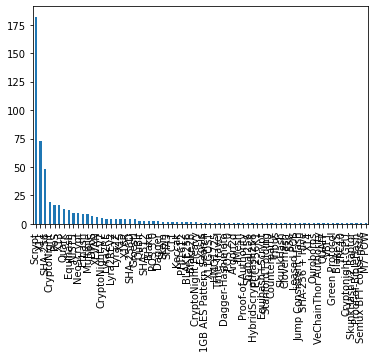

In [15]:
df2.Algorithm.value_counts().plot(kind="bar")
plt.show()

In [16]:
# bundling anything with an algorithm < 20
algs = df2.Algorithm.value_counts()
algs_replace = list(algs[algs < 20].index)
algs_replace[0:10]

['CryptoNight',
 'PoS',
 'X13',
 'Quark',
 'Equihash',
 'NIST5',
 'NeoScrypt',
 'Ethash',
 'Multiple',
 'DPoS']

In [17]:
mask = df2.Algorithm.isin(algs_replace)
df2.loc[mask, "Algorithm"] = "Other"

df2.Algorithm.value_counts()

Other      229
Scrypt     182
X11         73
SHA-256     48
Name: Algorithm, dtype: int64

In [18]:
# now we can use one hot encoding

In [19]:
print(df2.ProofType.nunique())
df2.ProofType.value_counts()

25


PoW                     237
PoW/PoS                 176
PoS                      86
DPoS                      9
PoC                       3
PoS/PoW                   2
PoW/nPoS                  1
PoW and PoS               1
DPOS                      1
PoS/PoW/PoT               1
PoS/LPoS                  1
Pos                       1
PoW/PoS                   1
dPoW/PoW                  1
PoST                      1
HPoW                      1
Proof of Authority        1
PoW + Hive                1
POBh                      1
Zero-Knowledge Proof      1
LPoS                      1
PoW/PoW                   1
TPoS                      1
Proof of Trust            1
PoA                       1
Name: ProofType, dtype: int64

In [20]:
# fixing typos
df2.loc[df2.ProofType == 'Pos', "ProofType"] = "PoS"
df2.loc[df2.ProofType == 'PoW and PoS', "ProofType"] = "PoW/PoS"
df2.loc[df2.ProofType == 'PoS/PoW', "ProofType"] = "PoW/PoS"
df2.loc[df2.ProofType == 'PoW/PoS ', "ProofType"] = "PoW/PoS"
df2.loc[df2.ProofType == 'PoW/PoW ', "ProofType"] = "PoW"

In [21]:
# bundling again, less than 50
pts = df2.ProofType.value_counts()
pts_replace = list(pts[pts < 50].index)
pts_replace[0:10]

['DPoS',
 'PoC',
 'HPoW',
 'PoS/PoW/PoT',
 'Zero-Knowledge Proof',
 'PoS/LPoS',
 'dPoW/PoW',
 'PoW + Hive',
 'PoW/nPoS',
 'PoST']

In [22]:
mask = df2.ProofType.isin(pts_replace)
df2.loc[mask, "ProofType"] = "Other"

df2.ProofType.value_counts()

PoW        237
PoW/PoS    180
PoS         87
Other       28
Name: ProofType, dtype: int64

In [23]:
df2.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
1,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
2,Other,PoW/PoS,2.927942e+10,3.141593e+11
3,SHA-256,PoW,1.792718e+07,2.100000e+07
4,Other,PoW,1.076842e+08,0.000000e+00


In [24]:
# one hot encoding
oh_cols = ["Algorithm", "ProofType"]
df_oh = df2.loc[:, oh_cols]

df_oh = pd.get_dummies(df_oh)
df_oh.head()

,Algorithm_Other,Algorithm_SHA-256,Algorithm_Scrypt,Algorithm_X11,ProofType_Other,ProofType_PoS,ProofType_PoW,ProofType_PoW/PoS
0,0,0,1,0,0,0,0,1
1,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,0,1
3,0,1,0,0,0,0,1,0
4,1,0,0,0,0,0,1,0


In [25]:
num_cols = ["TotalCoinsMined", "TotalCoinSupply"]
df_num = df2.loc[:, num_cols]

# standard scaled numeric columns
scaler = StandardScaler()
scaler.fit(df_num)

df_num = pd.DataFrame(scaler.transform(df_num), columns=num_cols)
df_num.head()

,TotalCoinsMined,TotalCoinSupply
0,-0.117108,-0.152870
1,-0.093970,-0.145009
2,0.524946,4.489424
3,-0.116715,-0.152560
4,-0.114747,-0.152870


In [26]:
df_train = pd.concat([df_num, df_oh], axis=1)
df_train.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_Other,Algorithm_SHA-256,Algorithm_Scrypt,Algorithm_X11,ProofType_Other,ProofType_PoS,ProofType_PoW,ProofType_PoW/PoS
0,-0.117108,-0.152870,0,0,1,0,0,0,0,1
1,-0.093970,-0.145009,0,0,1,0,0,0,0,1
2,0.524946,4.489424,1,0,0,0,0,0,0,1
3,-0.116715,-0.152560,0,1,0,0,0,0,1,0
4,-0.114747,-0.152870,1,0,0,0,0,0,1,0


In [27]:
 # TSNE
tsne = TSNE(random_state=42)
tsne_features = tsne.fit_transform(df_train)
print(tsne_features.shape)

tsne_df = pd.DataFrame(tsne_features, columns=["Feature1", "Feature2"])
tsne_df.head()

(532, 2)


,Feature1,Feature2
0,-0.119207,-25.570347
1,2.655441,-32.509624
2,11.571429,2.455456
3,-9.448010,3.251187
4,3.909024,21.458342


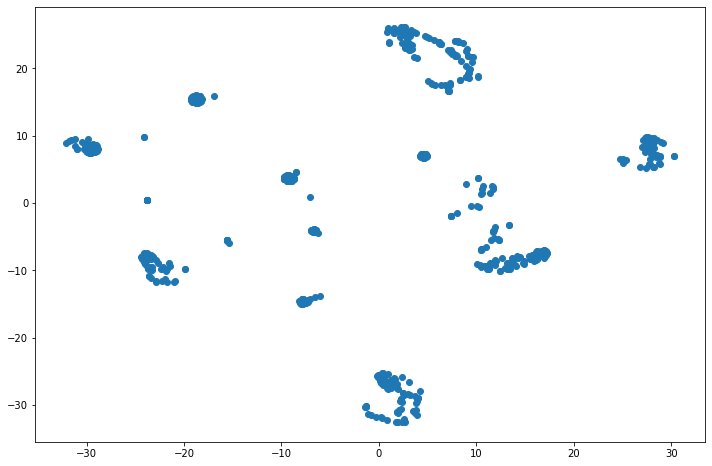

In [28]:
plt.figure(figsize=(12, 8))
plt.scatter(tsne_df["Feature1"], tsne_df["Feature2"])
plt.show()

In [29]:
# hard to cluster

# PCA

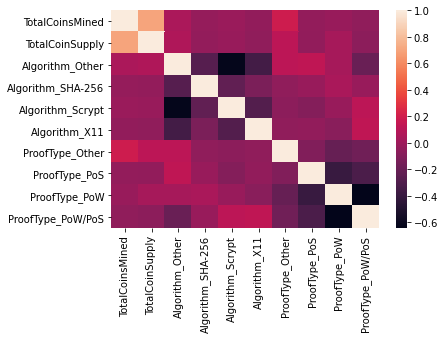

In [30]:
# check for multi-correlation first
corrs = df_train.corr()
sns.heatmap(corrs)
plt.show()

In [31]:
corrs

,TotalCoinsMined,TotalCoinSupply,Algorithm_Other,Algorithm_SHA-256,Algorithm_Scrypt,Algorithm_X11,ProofType_Other,ProofType_PoS,ProofType_PoW,ProofType_PoW/PoS
TotalCoinsMined,1.000000,0.702301,0.053187,-0.025781,-0.009377,-0.042141,0.190232,-0.033243,-0.017466,-0.045446
TotalCoinSupply,0.702301,1.000000,0.069557,-0.034459,-0.015754,-0.049680,0.116940,-0.039411,0.033228,-0.059287
Algorithm_Other,0.053187,0.069557,1.000000,-0.273775,-0.626900,-0.346698,0.118113,0.128826,0.038061,-0.196425
Algorithm_SHA-256,-0.025781,-0.034459,-0.273775,1.000000,-0.227091,-0.125589,-0.044845,-0.015071,0.047739,-0.017203
Algorithm_Scrypt,-0.009377,-0.015754,-0.626900,-0.227091,1.000000,-0.287579,-0.063504,-0.093878,-0.016573,0.120762
Algorithm_X11,-0.042141,-0.049680,-0.346698,-0.125589,-0.287579,1.000000,-0.045068,-0.043396,-0.071672,0.130480
ProofType_Other,0.190232,0.116940,0.118113,-0.044845,-0.063504,-0.045068,1.000000,-0.104218,-0.211265,-0.168550
ProofType_PoS,-0.033243,-0.039411,0.128826,-0.015071,-0.093878,-0.043396,-0.104218,1.000000,-0.396317,-0.316187
ProofType_PoW,-0.017466,0.033228,0.038061,0.047739,-0.016573,-0.071672,-0.211265,-0.396317,1.000000,-0.640956
ProofType_PoW/PoS,-0.045446,-0.059287,-0.196425,-0.017203,0.120762,0.130480,-0.168550,-0.316187,-0.640956,1.000000


In [32]:
# PCA should help

[0.513, 0.13, 0.107, 0.089, 0.06, 0.052, 0.031, 0.019, 0.0, 0.0]


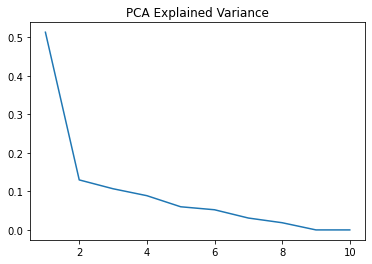

In [33]:
# Initialize PCA model
pca = PCA(n_components=len(df_train.columns))
pca.fit(df_train)

print([round(x, 3) for x in pca.explained_variance_ratio_])
plt.plot(range(1,len(df_train.columns)+1), pca.explained_variance_ratio_)
plt.title("PCA Explained Variance")
plt.show()

In [34]:
sum([0.495, 0.118, 0.089, 0.082, 0.059, 0.05, 0.031, 0.018, 0.015])

0.9570000000000001

In [35]:
len(df_train.columns)

10

In [36]:
sum([0.495, 0.118, 0.089, 0.082, 0.059, 0.05, 0.031, 0.018, 0.015, 0.009, 0.008, 0.008, 0.006, 0.006])

0.9940000000000001

In [37]:
pca = PCA(n_components=0.95)
pca.fit(df_train)

print([round(x, 3) for x in pca.explained_variance_ratio_])

[0.513, 0.13, 0.107, 0.089, 0.06, 0.052]


In [38]:
df_pca = pd.DataFrame(pca.transform(df_train))
df_pca.columns = [f"Feature {x}" for x in range(1, len(pca.explained_variance_ratio_)+1)]
df_pca.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6
0,-0.227031,-1.070787,0.057772,0.095149,0.072617,-0.361522
1,-0.205146,-1.072815,0.056124,0.084698,0.071916,-0.361461
2,3.544782,0.069134,-0.409225,2.951243,-0.156233,-0.293438
3,-0.193367,0.359083,0.553888,-0.162806,-0.372686,0.405598
4,-0.152235,0.897668,0.045201,-0.112143,-0.180703,-0.268088


In [39]:
# TSNE
tsne = TSNE(random_state=42)
tsne_features = tsne.fit_transform(df_pca)
print(tsne_features.shape)

tsne_df = pd.DataFrame(tsne_features, columns=["Feature1", "Feature2"])
tsne_df.head()

(532, 2)


,Feature1,Feature2
0,-21.219667,-18.076525
1,-22.458424,-11.688005
2,-8.599114,-0.639001
3,30.352541,-10.253101
4,18.109968,18.633635


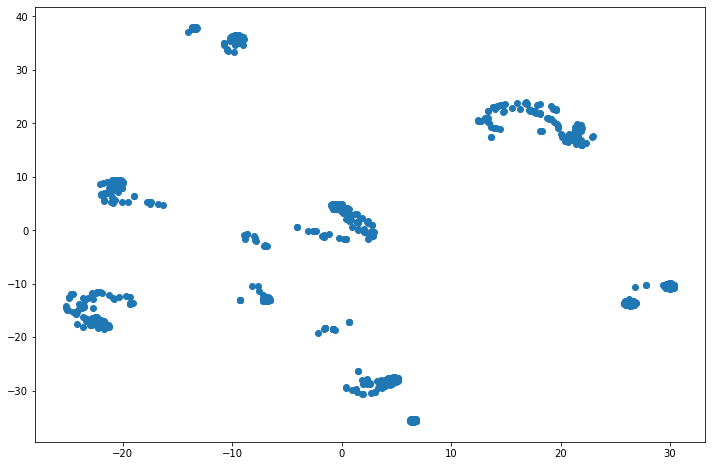

In [40]:
plt.figure(figsize=(12, 8))
plt.scatter(tsne_df["Feature1"], tsne_df["Feature2"])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


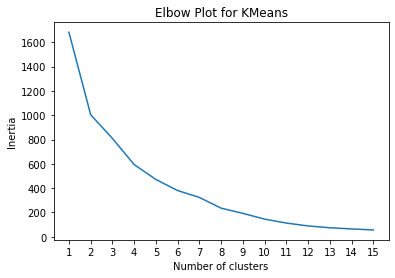

In [41]:
# KMEANS

inertia = []
k = list(range(1, 16))


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(df_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,16))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title("Elbow Plot for KMeans")
plt.show()

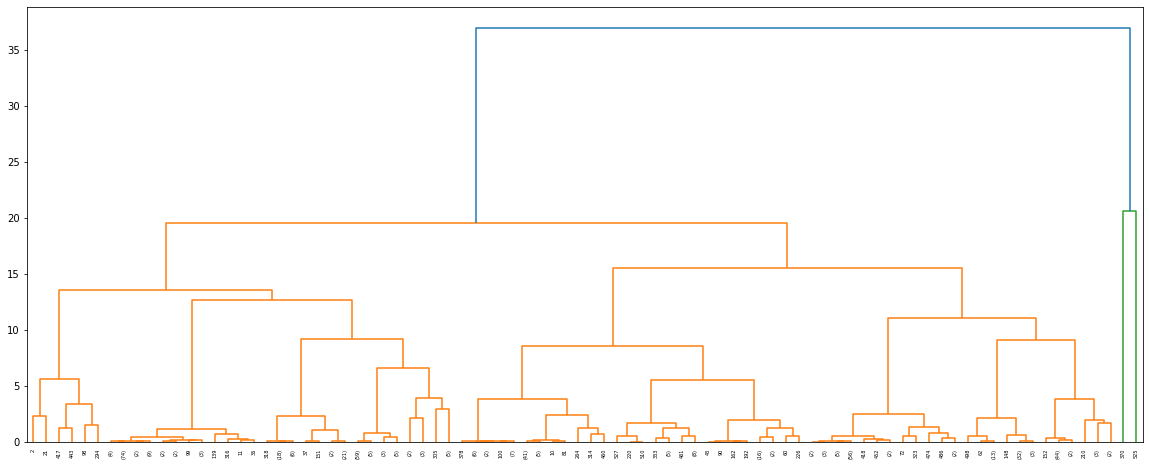

In [42]:
 # Hierarchical Agglomerative
mergings = linkage(df_pca, method='ward')

plt.figure(figsize=(20,8))
dendrogram(mergings,
           p = 7,
           truncate_mode = 'level',
          leaf_rotation=90,
          leaf_font_size=5)
plt.show()

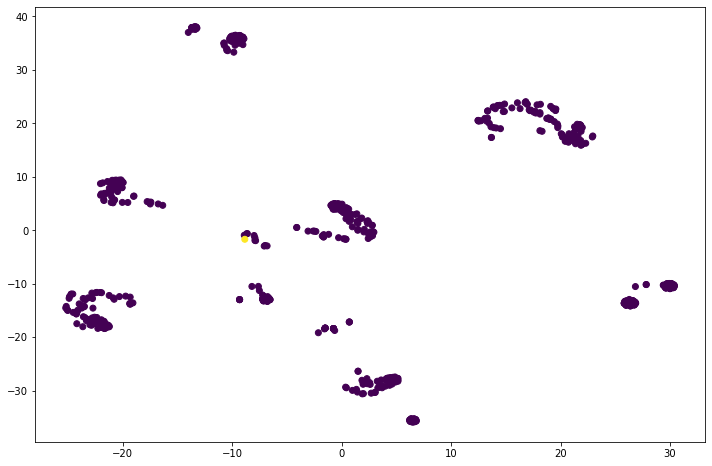

In [43]:
# Initializing model with K =2
k = 2
model = KMeans(n_clusters=k, random_state=42)

# Fitting model
model.fit(df_pca)

# predictions
k_labels = model.predict(df_pca)

plt.figure(figsize=(12, 8))
plt.scatter(tsne_df["Feature1"], tsne_df["Feature2"], c=k_labels)
plt.show()

In [44]:
df_names = pd.DataFrame()
df_names["CoinName"] = crypto_names
df_names["Cluster"] = k_labels

df_names.loc[df_names.Cluster == 1]

,CoinName,Cluster
525,BitTorrent,1


In [45]:
df.loc[df.CoinName.isin(["TurtleCoin", "BitTorrent"])]

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
TRTL,TurtleCoin,CryptoNight,True,PoW,5.313984e+10,1000000000000
BTT,BitTorrent,TRC10,True,DPoS,9.899887e+11,990000000000


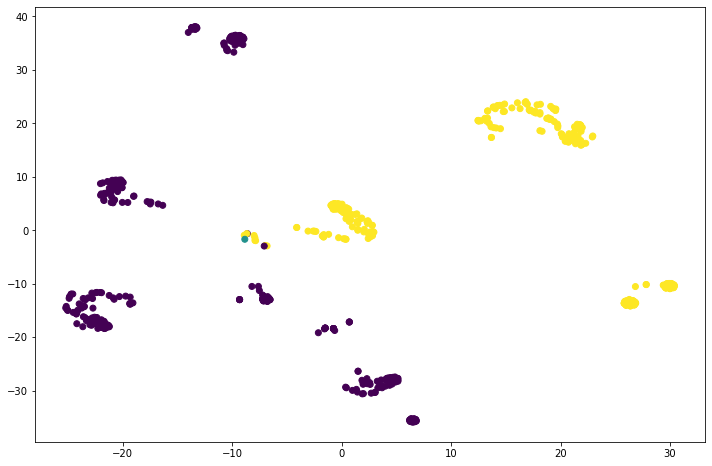

In [46]:
# Initializing model with K =3
k = 3
model = KMeans(n_clusters=k, random_state=42)

# Fitting model
model.fit(df_pca)

# predictions
k_labels = model.predict(df_pca)

plt.figure(figsize=(12, 8))
plt.scatter(tsne_df["Feature1"], tsne_df["Feature2"], c=k_labels)
plt.show()

In [47]:
df_names = pd.DataFrame()
df_names["CoinName"] = crypto_names
df_names["Cluster"] = k_labels

df_names.loc[df_names.Cluster == 2]

,CoinName,Cluster
3,Bitcoin,2
4,Ethereum,2
5,Litecoin,2
7,Monero,2
8,Ethereum Classic,2
9,ZCash,2
11,DigiByte,2
14,ProsperCoin,2
16,Spreadcoin,2
17,Argentum,2


In [48]:
df_pca.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6
0,-0.227031,-1.070787,0.057772,0.095149,0.072617,-0.361522
1,-0.205146,-1.072815,0.056124,0.084698,0.071916,-0.361461
2,3.544782,0.069134,-0.409225,2.951243,-0.156233,-0.293438
3,-0.193367,0.359083,0.553888,-0.162806,-0.372686,0.405598
4,-0.152235,0.897668,0.045201,-0.112143,-0.180703,-0.268088


In [49]:
df_plot = df_pca.copy()
df_plot["CoinName"] = crypto_names
df_plot["Cluster"] = k_labels

df_plot.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,CoinName,Cluster
0,-0.227031,-1.070787,0.057772,0.095149,0.072617,-0.361522,42 Coin,0
1,-0.205146,-1.072815,0.056124,0.084698,0.071916,-0.361461,404Coin,0
2,3.544782,0.069134,-0.409225,2.951243,-0.156233,-0.293438,EliteCoin,0
3,-0.193367,0.359083,0.553888,-0.162806,-0.372686,0.405598,Bitcoin,2
4,-0.152235,0.897668,0.045201,-0.112143,-0.180703,-0.268088,Ethereum,2


#Conclusion

Not possible to cluster these cryptocurrencies in a useful way. The kmeans graph/elbow plot has no real angle to indicate a difference - smooth curve.The hierarchical graph shows many different clusters, but no big separations.